This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/8_Trees_Boosting/N3_b_Random_Forest_Classif.ipynb)

## RANDOM FOREST Classifiers


In [3]:
from sklearn import tree
import numpy as np
from IPython.display import Image

%matplotlib inline
import matplotlib.pyplot as plt

**First, construct a tree based classifier, on IRIS data set (*), and evaluate the 'best' depth to use on a classification tree by cross-vaidation.**

(*) Recall that this dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. 
The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width (see the [sklearn guide for iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)).

### Question 13
 
* As IRIS data file contains only 150 4-dimensional samples, assuming that we impose that no less than 2 samples are contained in a leaf, and that the training test is chosen to contain 100 samples, what is the possible maximal depth? 

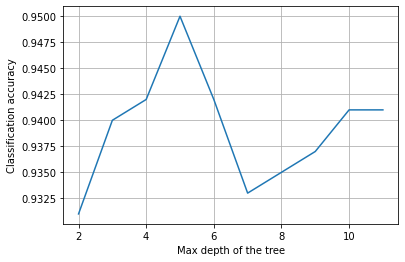

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = load_iris()
depth_array = np.arange(2, 12)
estd_accuracy = []

cv = ShuffleSplit(n_splits=20, test_size=0.33)

for nbdepth in depth_array:
    clf = tree.DecisionTreeClassifier(
        max_depth=nbdepth, criterion="gini", min_samples_leaf=2
    )
    scores = cross_val_score(clf, iris.data, iris.target, cv=cv)
    estd_accuracy.append(scores.mean())

plt.plot(depth_array, estd_accuracy)
plt.xlabel("Max depth of the tree")
plt.ylabel("Classification accuracy")
plt.grid()

**Visualize the obtained tree for depth = 4** (this value can be changed..)

In [19]:
nbdepth = 4
clf = tree.DecisionTreeClassifier(max_depth=nbdepth, criterion="gini")
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.33, random_state=None
)
clf = clf.fit(X_train, y_train)

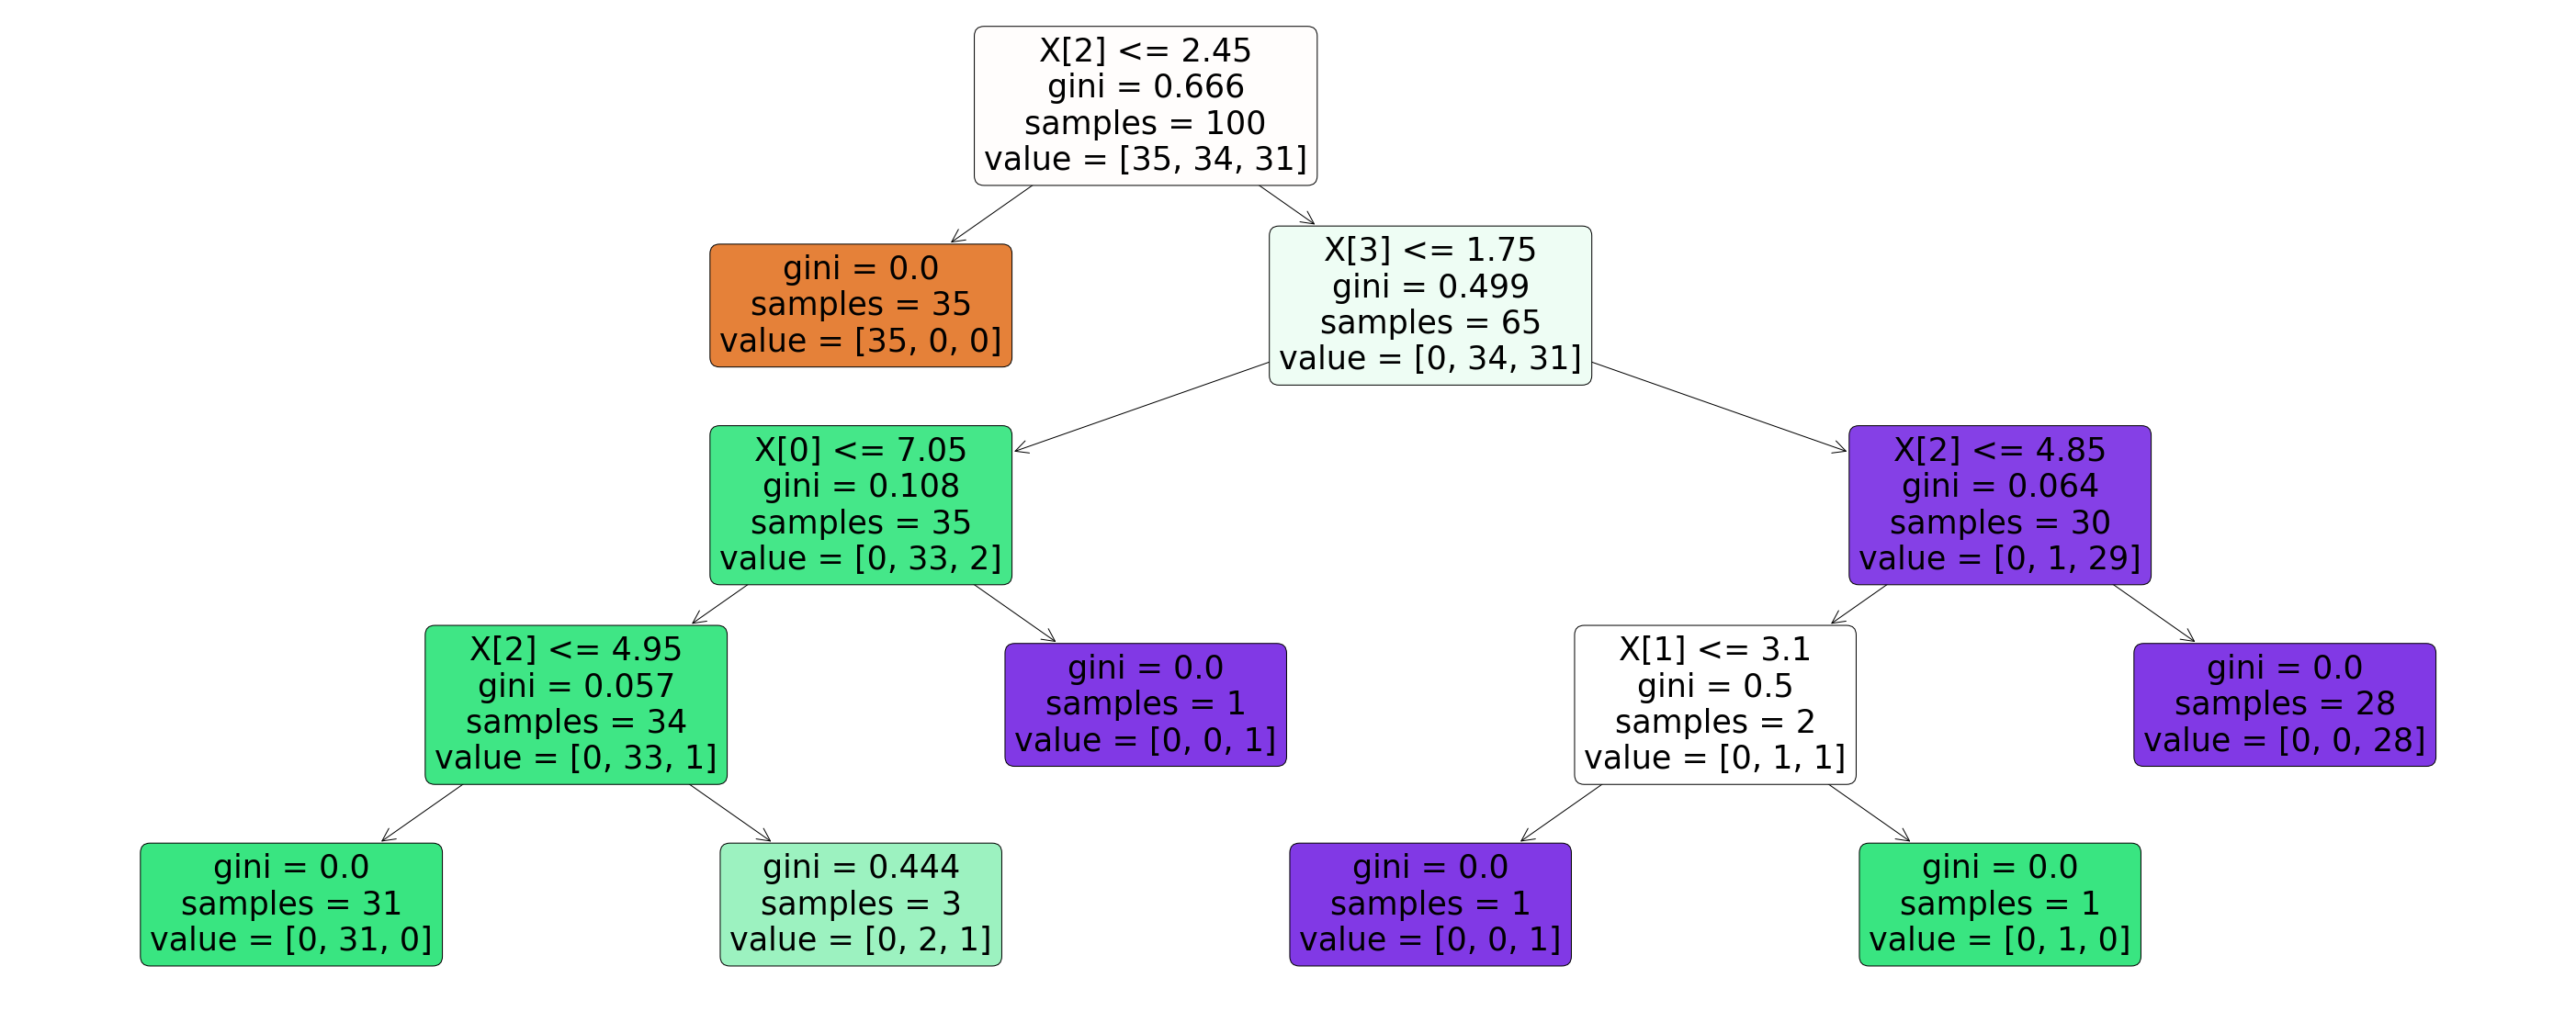

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 20))
a = plot_tree(clf, filled=True, rounded=True, fontsize=35)

## Exercize 14
- Compute the confusion matrix associated to this classifier. (Hint : see N1_Classif_tree.ipynb)
- Compute the mean accuracy of this tree classifier. (Hint : see N1_Classif_tree.ipynb)

In [22]:
from sklearn import metrics

y_est = clf.predict(X_train)
print("Confusion matrix from training set :")
C_train = metrics.confusion_matrix(y_est, y_train)
print("C_train =\n {}".format(C_train))
print("accuracy= {}".format(metrics.accuracy_score(y_est, y_train)))

y_est = clf.predict(X_test)
print("Confusion matrix from test set :")
C_test = metrics.confusion_matrix(y_est, y_test)
print("C_test =\n {}".format(C_test))
print("accuracy= {}".format(metrics.accuracy_score(y_est, y_test)))


Confusion matrix from training set :
C_train =
 [[35  0  0]
 [ 0 34  1]
 [ 0  0 30]]
accuracy= 0.99
Confusion matrix from test set :
C_test =
 [[15  0  0]
 [ 0 16  3]
 [ 0  0 16]]
accuracy= 0.94


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=None)
scores = cross_val_score(clf, iris.data, iris.target, cv=cv)
print(
    "Mean Accuracy and 95 percent confidence interval : %0.2f (+/- %0.2f)"
    % (scores.mean(), scores.std() * 2)
)

Mean Accuracy and 95 percent confidence interval : 0.94 (+/- 0.08)


### Random forest classifier computation

In [26]:
from sklearn.ensemble import RandomForestClassifier

mdepth_array = np.arange(1, 5)
for mdepth in mdepth_array:
    print("mdepth={}".format(mdepth))
    clf = RandomForestClassifier(
        n_estimators=40,
        max_depth=mdepth,
        random_state=None,
        min_samples_split=2,
        criterion="gini",
    )
    scores = cross_val_score(clf, iris.data, iris.target, cv=10)
    print(
        "Mean Accuracy and 95 percent confidence interval: %0.2f (+/- %0.2f)"
        % (scores.mean(), scores.std() * 2)
    )

mdepth=1
Mean Accuracy and 95 percent confidence interval: 0.92 (+/- 0.21)
mdepth=2
Mean Accuracy and 95 percent confidence interval: 0.97 (+/- 0.07)
mdepth=3
Mean Accuracy and 95 percent confidence interval: 0.97 (+/- 0.07)
mdepth=4
Mean Accuracy and 95 percent confidence interval: 0.97 (+/- 0.07)


### Exercize 15
- Change the value of parameter max_depth (ranging from 1 to 5) and record the obtained accuracy. Explain your findings. 
- Propose a method for setting the 'best' value of parameter n_estimator. 

## Study of feature importance
The purpose is to evaluate the importance of a given feature. This may be done by recording for all the trees involved in the forest, and all the nodes within each tree, the relevance of a feature : the contribution of each feature is increased each time it is used for splitting a node. This contribution correspond to the gain of impurity weighted by the relative number (wrt to the train set size) of samples in the splitted node. 

In [37]:
clf.fit(iris.data, iris.target)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
print(std)
indices = np.argsort(importances)[::-1]
indices

[0.11533656 0.01042464 0.25990348 0.25493401]


array([3, 2, 0, 1], dtype=int64)

Feature ranking:
1. feature 3 (0.506726)
2. feature 2 (0.426325)
3. feature 0 (0.060196)
4. feature 1 (0.006753)


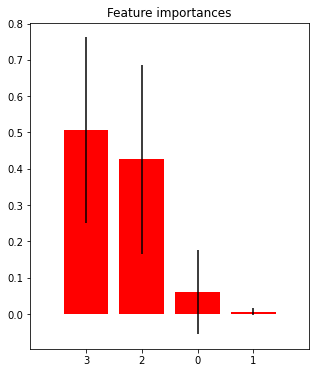

In [38]:
# Print the feature ranking
print("Feature ranking:")

for f in range(4):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    # Plot the feature importances of the forest
plt.figure(figsize=(5, 6))
plt.title("Feature importances")
plt.bar(
    range(np.asarray(iris.data).shape[1]),
    importances[indices],
    color="r",
    yerr=std[indices],
    align="center",
)
plt.xticks(range(np.asarray(iris.data).shape[1]), indices)
plt.xlim([-1, np.asarray(iris.data).shape[1]])

plt.show()

In [39]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import ShuffleSplit
mdepth_array = np.arange(1, 5)
for mdepth in mdepth_array:
    print("mdepth={}".format(mdepth))
    clf2 = ExtraTreesRegressor(
    n_estimators=40, criterion="mse", max_depth=mdepth, random_state=None)
    scores = cross_val_score(clf2, iris.data, iris.target, cv=10)
    print(
        "Mean Accuracy and 95 percent confidence interval: %0.2f (+/- %0.2f)"
        % (scores.mean(), scores.std() * 2)
    )

mdepth=1
Mean Accuracy and 95 percent confidence interval: 0.09 (+/- 0.36)
mdepth=2
Mean Accuracy and 95 percent confidence interval: 0.15 (+/- 0.61)
mdepth=3
Mean Accuracy and 95 percent confidence interval: 0.17 (+/- 0.69)
mdepth=4
Mean Accuracy and 95 percent confidence interval: 0.19 (+/- 0.75)


In [40]:
clf2.fit(iris.data, iris.target)
importances = clf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf2.estimators_], axis=0)
print(std)
indices = np.argsort(importances)[::-1]
indices

[0.17271288 0.00369913 0.38618624 0.37432004]


array([3, 2, 0, 1], dtype=int64)

Feature ranking:
1. feature 3 (0.501053)
2. feature 2 (0.444694)
3. feature 0 (0.052475)
4. feature 1 (0.001778)


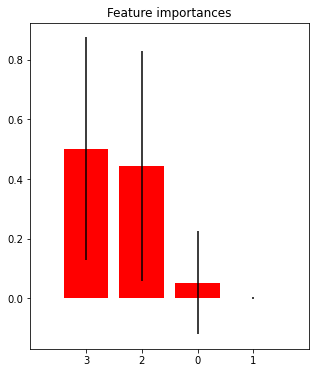

In [41]:
# Print the feature ranking
print("Feature ranking:")

for f in range(4):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    # Plot the feature importances of the forest
plt.figure(figsize=(5, 6))
plt.title("Feature importances")
plt.bar(
    range(np.asarray(iris.data).shape[1]),
    importances[indices],
    color="r",
    yerr=std[indices],
    align="center",
)
plt.xticks(range(np.asarray(iris.data).shape[1]), indices)
plt.xlim([-1, np.asarray(iris.data).shape[1]])

plt.show()

## Exercize 16
Evaluate the feature importance in the IRIS Data Set , using ExtraTreesClassifier. 
- Compare with the results above. 
- What can be concluded about the features importance? 